# Figure 3

In [1]:
import sys
sys.path.append('..')
sys.path.append('../blackbox')

from db import *
from analysis import *
from helpers import *

In [12]:
data = (
    session.query(
        ImageCreationRequest.model,
        ImageCreationRequest.response_time,
        ImageCreationRequest.success,
    ).filter(
        ImageCreationRequest.timing_valid == True,
    )
)
df = query_to_df(data)
print(len(df))

df_dalle3 = df[df['model'] == 'dalle-3']
df_dalle3_success = df_dalle3[df_dalle3['success'] == True]
df_dalle3_rejection = df_dalle3[df_dalle3['success'] == False]

3679


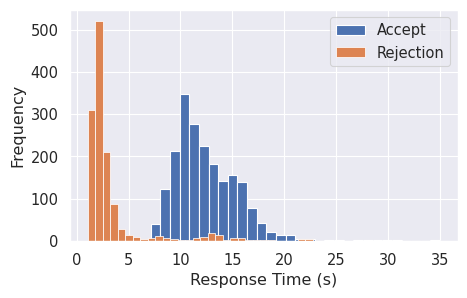

In [16]:
plt.figure(figsize=(5, 3))
sns.histplot(df_dalle3_success['response_time'], bins=30, color=palette[0], alpha=1)
sns.histplot(df_dalle3_rejection['response_time'], bins=30, color=palette[1], alpha=1)
plt.legend(['Accept', 'Rejection'])
plt.xlabel('Response Time (s)')
plt.ylabel('Frequency')

plt.show()